In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pyBigWig
import pysam
import logging
import pybedtools as bt
logger = logging.getLogger('nb')
import matplotlib
from matplotlib import rc
rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
from mpl_toolkits.axes_grid.inset_locator import inset_axes

(624, 1400)


,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
"10031\tENSG00000075420.8\tFNDC3B\tchr3\t+\t171799152\t171799189\t171757417\t171757561\t171830241\t171830380\t10031\t6,15\t36,46\t1,1\t83,49\t135\t99\t7.04390751172e-06\t0.000625872328723\t0.109,0.193\t0.009,0.015\t0.139",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065991,...,0.0,0.0,0.0,0.065991,0.0,0.0,0.0,0.0,0.0,0.0
"10056\tENSG00000170322.10\tNFRKB\tchr11\t-\t129763191\t129763280\t129762609\t129762765\t129764253\t129764333\t10056\t43,30\t1,0\t9,10\t6,7\t187\t99\t1.5511233602e-06\t0.000170687205452\t0.958,1.0\t0.443,0.431\t0.542",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"10181\tENSG00000087884.10\tAAMDC\tchr11\t+\t77566390\t77566528\t77553524\t77553674\t77580767\t77580863\t10181\t30,28\t42,62\t2,3\t58,47\t197\t99\t7.25041182648e-09\t1.46772959408e-06\t0.264,0.185\t0.017,0.031\t0.201",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"1037\tENSG00000079819.12\tEPB41L2\tchr6\t-\t131199243\t131199390\t131190702\t131191266\t131206235\t131206408\t1037\t35,37\t21,22\t32,42\t85,87\t197\t99\t8.36000272342e-08\t1.3288069514e-05\t0.456,0.458\t0.159,0.195\t0.28",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"10445\tENSG00000104852.10\tSNRNP70\tchr19\t+\t49605370\t49605442\t49604646\t49604728\t49607890\t49607992\t10445\t46,43\t191,230\t21,20\t309,274\t170\t99\t5.49527259142e-07\t6.97737037081e-05\t0.123,0.098\t0.038,0.041\t0.071",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
def get_max_value(df):
    dfx = df.fillna(0)
    allmax = 0
    colmax = 0
    for col, row in dfx.iteritems():
        if max(row) > allmax:
            allmax = max(row)
            colmax = col
        print(col, max(row))
    print(colmax, allmax)
    return colmax, allmax
def return_coord(row):
    X = row['Unnamed: 0'].split('\t')
    return "{}:{}-{}".format(X[3], int(X[8])-50, int(X[9])+50)
def return_chrom(row):
    X = row['Unnamed: 0'].split('\t')
    return "{}".format(X[3])
def get_skipped(row):
    print(row['Unnamed: 0'])
    X = row['Unnamed: 0'].split('\t')
    print "{}:{}-{}".format(X[3],X[5],X[6])

In [17]:
df = pd.read_table('/projects/ps-yeolab3/bay001/maps/current/se_5p/203_01_HNRNPC.ip.included.feature.se.raw_density_matrix.csv',
                 sep=',')
print(df.shape)
df['pos'] = df.apply(return_coord,axis=1)

del df['Unnamed: 0']
df.set_index(['pos'],inplace=True)
df.head()

(624, 1401)


,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
pos,,,,,,,,,,,,,,,,,,,,,
chr3:171757511-171830291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065991,...,0.0,0.0,0.0,0.065991,0.0,0.0,0.0,0.0,0.0,0.0
chr11:129762715-129764303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
chr11:77553624-77580817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
chr6:131191216-131206285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
chr19:49604678-49607940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
get_max_value(df)

('0', 0.13198207318800001)
('1', 0.065991036593900002)
('2', 0.065991036593900002)
('3', 0.13198207318800001)
('4', 0.19797310233100002)
('5', 0.065991036593900002)
('6', 0.13198207318800001)
('7', 0.065991036593900002)
('8', 0.13198207318800001)
('9', 0.065991036593900002)
('10', 0.065991036593900002)
('11', 0.13198207318800001)
('12', 0.065991036593900002)
('13', 0.26396414637600002)
('14', 0.13198207318800001)
('15', 0.19797310233100002)
('16', 0.065991036593900002)
('17', 0.19797310233100002)
('18', 0.13198207318800001)
('19', 0.19797310233100002)
('20', 0.13198207318800001)
('21', 0.065991036593900002)
('22', 0.13198207318800001)
('23', 0.19797310233100002)
('24', 0.19797310233100002)
('25', 0.065991036593900002)
('26', 0.065991036593900002)
('27', 0.19797310233100002)
('28', 0.13198207318800001)
('29', 0.065991036593900002)
('30', 0.26396414637600002)
('31', 0.52792829275099995)
('32', 0.26396414637600002)
('33', 0.19797310233100002)
('34', 0.13198207318800001)
('35', 0.065991036

('511', 17.091676712000002)

In [20]:
df.sort_values(['511']).tail()

,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
pos,,,,,,,,,,,,,,,,,,,,,
chr14:24109054-24112410,0.0,0.0,0.0,0.0,0.0,0.0,0.131982,0.0,0.065991,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
chr14:24109054-24112410,0.0,0.0,0.0,0.0,0.0,0.0,0.131982,0.0,0.065991,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
chr11:102033252-102076673,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.065991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065991,0.0
chr6:31803178-31805062,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
chr20:47895695-47905631,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [22]:
df.ix['chr20:47895695-47905631'].sort_values()

0        0.000000
909      0.000000
908      0.000000
907      0.000000
905      0.000000
904      0.000000
903      0.000000
898      0.000000
910      0.000000
893      0.000000
877      0.000000
876      0.000000
875      0.000000
873      0.000000
872      0.000000
871      0.000000
870      0.000000
879      0.000000
869      0.000000
911      0.000000
917      0.000000
942      0.000000
941      0.000000
940      0.000000
939      0.000000
938      0.000000
937      0.000000
934      0.000000
913      0.000000
932      0.000000
          ...    
539      0.395946
1036     0.395946
541      0.395946
515      0.461937
887      0.461937
886      0.461937
504      0.461937
563      0.461937
533      0.659910
507      0.725901
588      0.725901
547      0.725901
490      0.725901
889      0.725901
529      0.791892
589      0.857883
516      0.923874
542      1.055857
548      1.451803
890      1.451803
513      1.517794
546      1.715767
508      1.715767
543      3.365543
509      3

In [29]:
df = pd.read_table('/projects/ps-yeolab3/bay001/maps/current/se/203_01_HNRNPC.ip.included.feature.se.raw_density_matrix.csv',
                 sep=',')
print(df.shape)
df['pos'] = df.apply(return_coord,axis=1)

del df['Unnamed: 0']
df.set_index(['pos'],inplace=True)
df.head()

(624, 1401)


,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
pos,,,,,,,,,,,,,,,,,,,,,
chr3:171757511-171830291,0.659910,0.593919,0.593919,0.593919,0.593919,0.395946,0.395946,0.329955,0.329955,0.395946,...,0.000000,0.000000,0.000000,0.065991,0.065991,0.065991,0.065991,0.065991,0.065991,0.065991
chr11:129762715-129764303,0.065991,0.065991,0.065991,0.065991,0.065991,0.065991,0.065991,0.065991,0.065991,0.065991,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chr11:77553624-77580817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.065991,0.065991,0.065991,0.065991,0.065991,0.065991,0.065991,0.065991,0.065991,0.065991
chr6:131191216-131206285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.197973,0.197973,0.197973,0.197973,0.197973,0.197973,0.197973,0.197973,0.197973,0.197973
chr19:49604678-49607940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


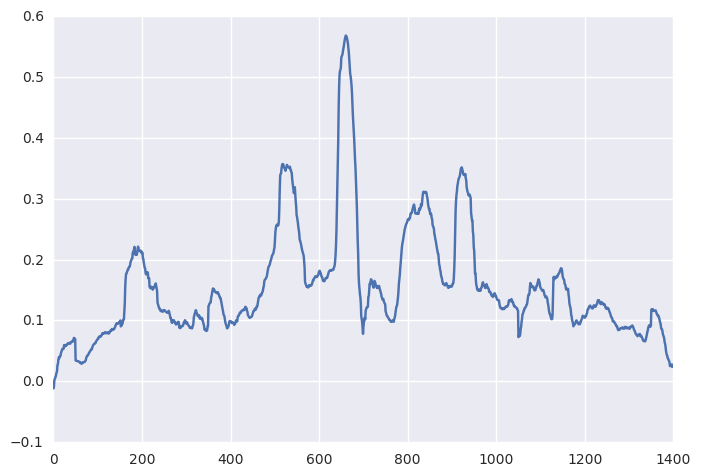

In [30]:
plt.plot(df.mean())

In [35]:
df.mean().sort_values()

0      -0.011599
1      -0.009028
2       0.001766
3       0.004321
4       0.005923
5       0.008055
6       0.011366
7       0.014571
8       0.016491
1397    0.023779
1392    0.025146
1394    0.025235
1393    0.025992
9       0.026740
1398    0.026846
1399    0.026846
1395    0.027139
1396    0.027847
10      0.028148
63      0.029083
64      0.029188
62      0.029506
65      0.029717
60      0.030880
66      0.031198
61      0.031198
1391    0.031223
59      0.031409
68      0.031409
67      0.031515
          ...   
674     0.474791
645     0.484040
673     0.486440
672     0.494583
671     0.500945
646     0.503922
670     0.505386
647     0.510161
648     0.511748
669     0.514904
649     0.516295
668     0.527611
650     0.531947
651     0.534062
652     0.535543
653     0.538927
667     0.539244
654     0.544109
666     0.546858
655     0.547810
656     0.553098
665     0.554367
657     0.557434
664     0.558809
658     0.562404
663     0.562933
659     0.565260
662     0.5656

In [108]:
df = pd.read_table('/projects/ps-yeolab3/bay001/maps/current/se_5p/203_01_HNRNPC.included.subtract_by_region.feature.normed_matrix.csv',
                 sep=',')
print(df.shape)
df['pos'] = df.apply(return_coord,axis=1)

del df['Unnamed: 0']
df.set_index(['pos'],inplace=True)
df.head()

(624, 1401)


,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
pos,,,,,,,,,,,,,,,,,,,,,
chr3:171757511-171830291,-0.000127,-0.000816,-0.000127,-0.000127,-0.000127,-0.000127,-0.000127,-0.000127,-0.000127,0.000436,...,-0.000127,-0.001505,-0.000127,0.000436,-0.000127,-0.000127,-0.000127,-0.000127,-0.000127,-0.000127
chr11:129762715-129764303,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,...,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026
chr11:77553624-77580817,-0.000003,-0.000003,-0.000003,-0.000713,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,...,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003
chr6:131191216-131206285,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,...,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026,-0.000026
chr19:49604678-49607940,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,...,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000654,-0.000654


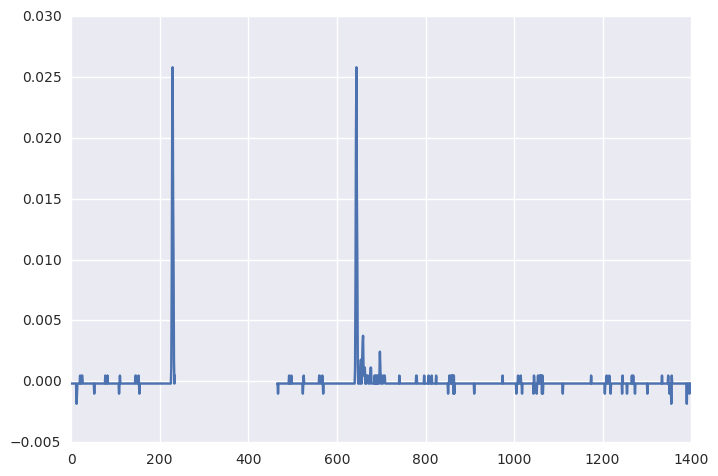

In [114]:
# get_max_value(df)
plt.plot(df.ix['chr15:25219553-25220554'])

Removing outliers (keep 0.95)
624
dropping: 15 events
Finished removing outliers (keep 0.95)


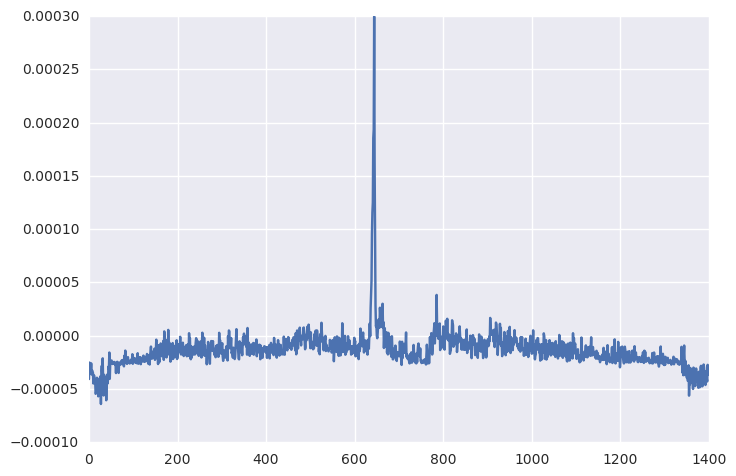

In [76]:
def remove_outliers(rbpdataframe, conf = 0.95):
    print("Removing outliers (keep {})".format(conf))
    means = list()
    sems = list()
    nums = rbpdataframe.shape[0]
    print(nums)
    dfx = pd.DataFrame()
    droppercent = (1-conf)/2.0
    dropnum = int(nums*(droppercent))
    print('dropping: {} events'.format(dropnum))
    for key, value in rbpdataframe.iteritems():
        df = rbpdataframe[key].dropna()
                
        df = df.sort_values()
        if(dropnum>0):
            df = df[dropnum:-dropnum]
        dfx = dfx.append(df)
        means.append(df.mean())
        sems.append(df.sem())
    print("Finished removing outliers (keep {})".format(conf))
    return means, sems, dfx

m, s, df = remove_outliers(df.reset_index(drop=True).fillna(0))
plt.plot(m)


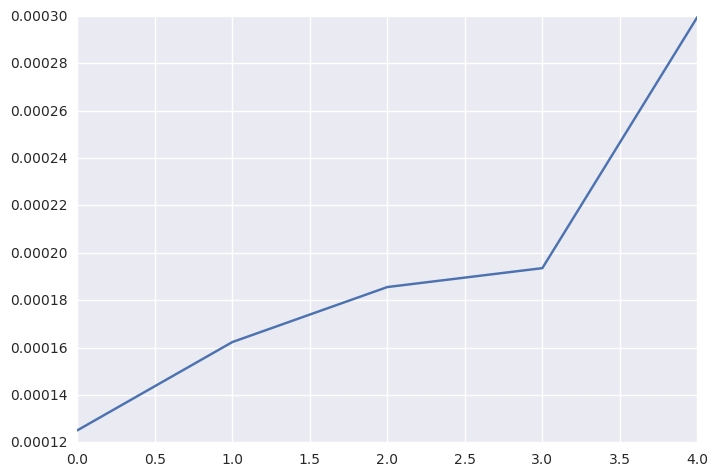

In [107]:
plt.plot(sorted(m)[1395:])

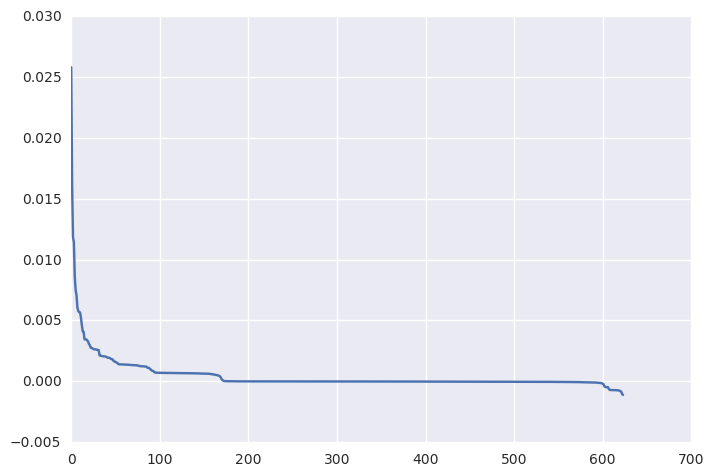

In [87]:
plt.plot(list(df['644'].sort_values(ascending=False)))

In [88]:
df['644'].sort_values(ascending=False)

pos
chr15:25219553-25220554      0.025790
chr2:242263606-242265457     0.016164
chr1:207262241-207262876     0.011845
chr6:31803178-31805062       0.011422
chr16:67974331-67976315      0.008594
chr16:67974331-67976315      0.007484
chr3:171757511-171830291     0.007058
chr6:31803178-31805062       0.006059
chr14:21702338-21737506      0.005776
chr2:70451711-70454916       0.005680
chr6:43746605-43752327       0.005666
chr2:241558398-241569415     0.005222
chr12:122995685-122999701    0.004612
chr2:61760988-61764746       0.004111
chr15:101827857-101832216    0.004073
chr2:3581795-3584363         0.003453
chr2:176804335-176812257     0.003452
chr2:176804335-176812257     0.003449
chr16:258137-270697          0.003360
chr9:132255824-132265651     0.003280
chr14:23444263-23445714      0.003081
chr20:49520488-49545237      0.002972
chr14:73525363-73538384      0.002765
chr5:102515839-102520422     0.002750
chr9:132255824-132265651     0.002714
chr15:77228013-77236148      0.002645
chr6:378

In [106]:
sorted(m)[1395:]

[0.00012504369182677667,
 0.00016231980308862605,
 0.00018555098023522403,
 0.00019353382851021412,
 0.0002995695501707872]